In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


#### `With or without replacement?`
In the video, you learned about two different ways of taking samples: with replacement and without replacement. Although it isn't always easy to tell which best fits various situations, it's important to correctly identify this so that any probabilities you report are accurate. In this exercise, you'll put your new knowledge to the test and practice figuring this out.

- For each scenario, decide whether it's sampling with replacement or sampling without replacement.
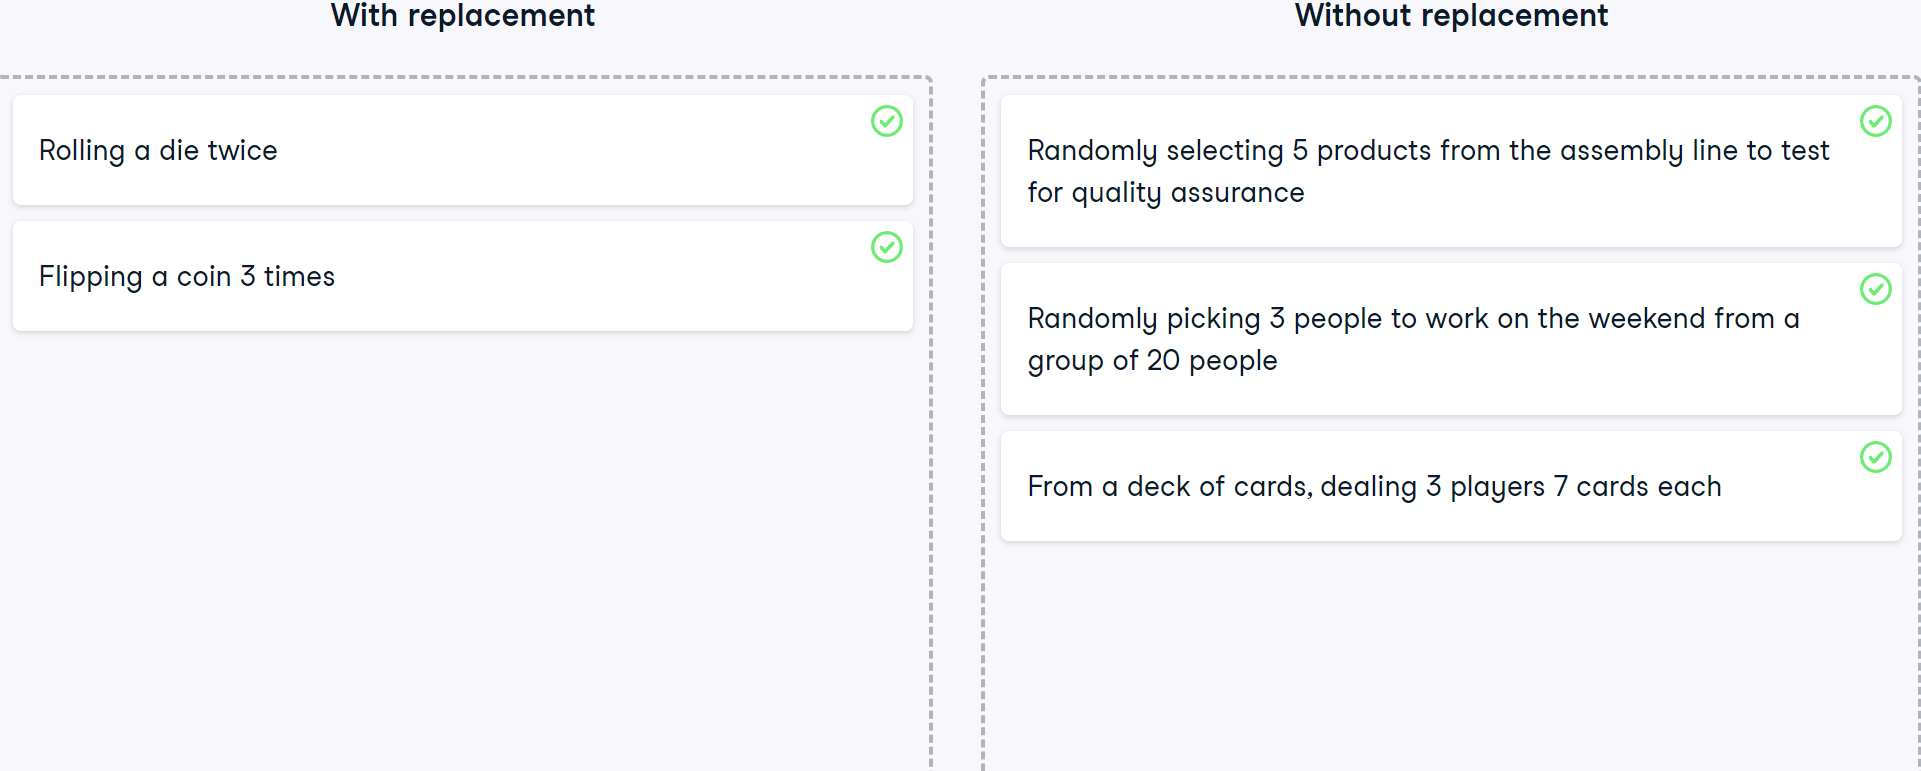
- Correctly identifying the type of sampling that needs to be used is key to calculating accurate probabilities. With replacement, everyone always has a 5% chance of working on the weekend. Without replacement, the second pick has a 4/19 chance, and the third pick has a 3/18 chance of working on the weekend.

#### `Calculating probabilities`
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

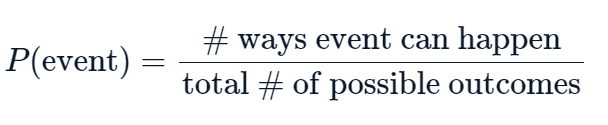

In [2]:
amir_deals = pd.read_excel('../../datasets/amir_deals.xlsx')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493-01-01 00:00:00,43
2,3,Product B,New,Won,5738-09-01 00:00:00,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


- Both pandas as pd and numpy as np are loaded and __amir_deals__ is available.

In [3]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


- Calculate the __probability__ of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as __probs__.

In [4]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
total_deals = counts.sum()
probs = counts/total_deals
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


#### Question
If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

`Possible answers`

- 15%
- 80.43%
- 8.43%
- 22.5%
- 124.3%

In [5]:
prob_product_C = probs['Product C']*100
print(prob_product_C)

8.426966292134832


#### `Sampling deals`
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Both pandas as pd and numpy as np are loaded and __amir_deals__ is available.

- Set the __random seed__ to _24_.
- Take a __sample__ of _5_ deals without replacement and store them as ___sample_without_replacement___.

In [6]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


- Take a sample of _5_ deals with replacement and save as __sample_with_replacement__.

In [7]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


#### Question
What type of sampling is better to use for this situation?

`Possible answers`

- With replacement

- `Without replacement` It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.

- It doesn't matter

#### `Creating a probability distribution`
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the __restaurant_groups__ DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The __restaurant_groups__ data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.

In [8]:
restaurant_groups = pd.read_excel('../../datasets/restaurant_groups.xlsx')
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


- Create a histogram of the __group_size__ column of __restaurant_groups__, setting bins to __[2, 3, 4, 5, 6]__. Remember to show the plot.

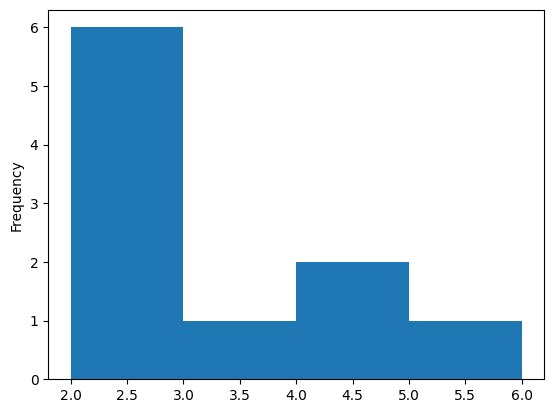

In [9]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].plot(kind='hist', bins=[2,3,4,5,6])
plt.show()

- Count the number of each __group_size__ in __restaurant_groups__, then divide by the number of rows in __restaurant_groups__ to calculate the probability of randomly selecting a group of each size. Save as size_dist.
Reset the index of __size_dist__.
- Rename the columns of __size_dist__ to __group_size__ and __prob__.

In [10]:
# Create probability distribution
restaurant_groups_count = restaurant_groups['group_size'].value_counts()
size_dist = restaurant_groups_count / len(restaurant_groups)

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


- Calculate the expected value of the __size_distribution__, which represents the expected group size, by multiplying the __group_size__ by the __prob__ and taking the sum.

In [11]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = np.sum(size_dist['group_size']*size_dist['prob'])
print(expected_value)

2.9000000000000004


- Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [12]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


#### `Identifying distributions`
Which sample is most likely to have been taken from a uniform distribution?
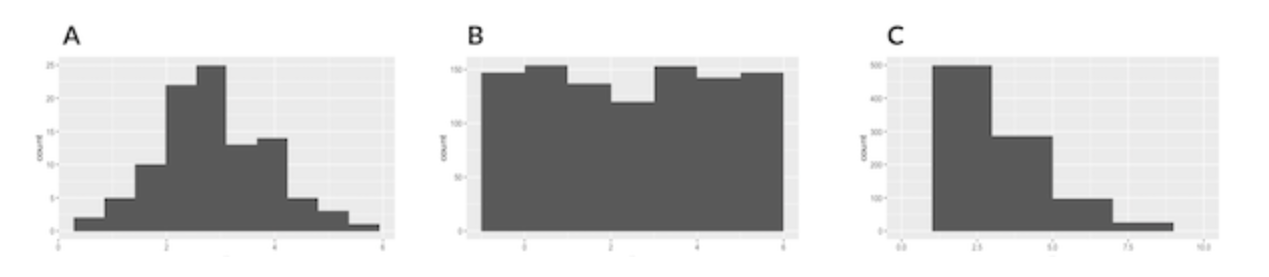

#### Select one answer

- A
- `B` since the histogram depicts a sample and not the actual probability distribution, each outcome won't happen the exact same number of times due to randomness, but they're similar in number.
- C


#### `Expected value vs. sample mean`
The app to the right will take a sample from a discrete uniform distribution, which includes the numbers 1 through 9, and calculate the sample's mean. You can adjust the size of the sample using the slider. Note that the expected value of this distribution is 5.

A sample is taken, and you win twenty dollars if the sample's mean is less than 4. There's a catch: you get to pick the sample's size.

Which sample size is most likely to win you the twenty dollars?

- `10` Since the sample mean will likely be closer to 5 (the expected value) with larger sample sizes, you have a better chance of getting a sample mean further away from 5 with a smaller sample.
- 100
- 1000
- 5000
- 10000

#### `Which distribution?`
At this point, you've learned about the two different variants of the uniform distribution: the discrete uniform distribution, and the continuous uniform distribution. In this exercise, you'll decide which situations follow which distribution.
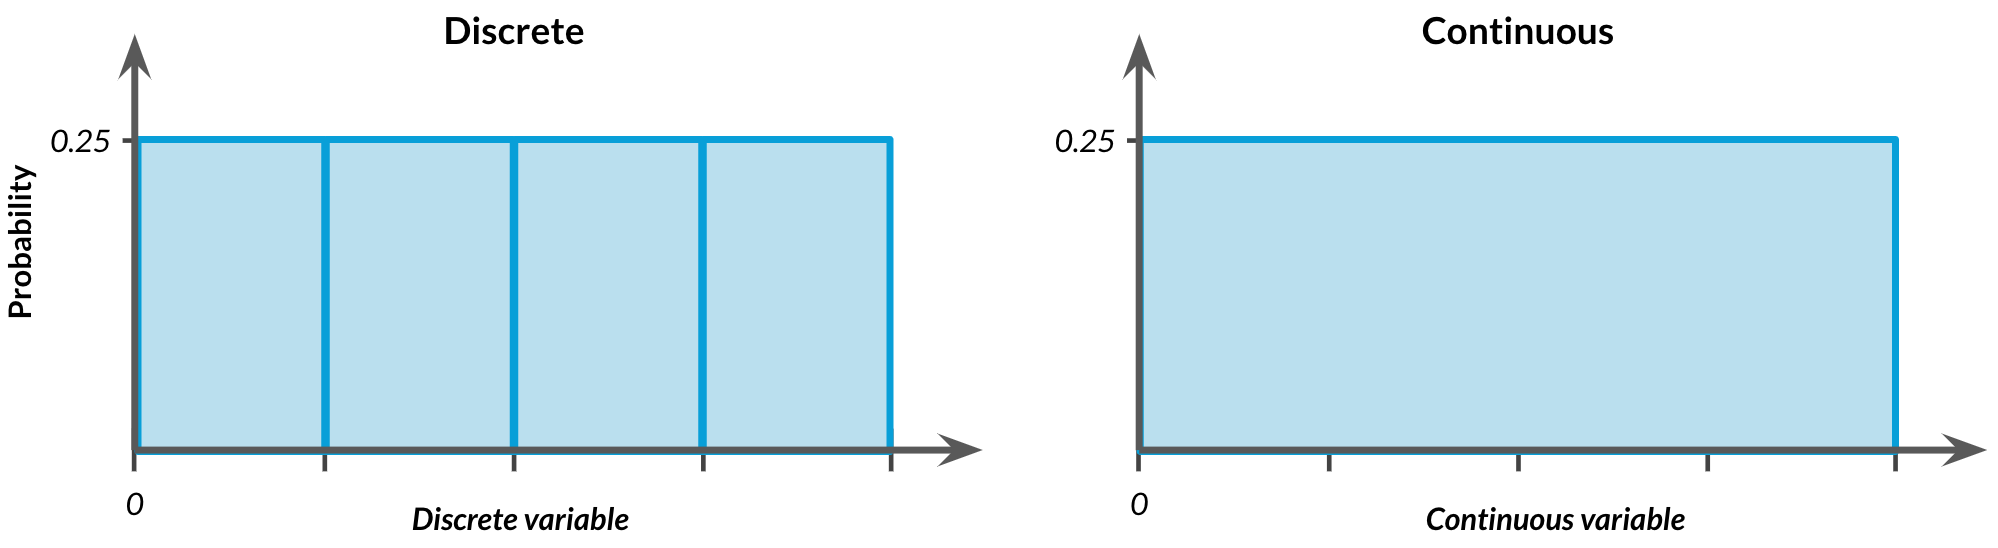



- Map each situation to the probability distribution it would best be modeled by.

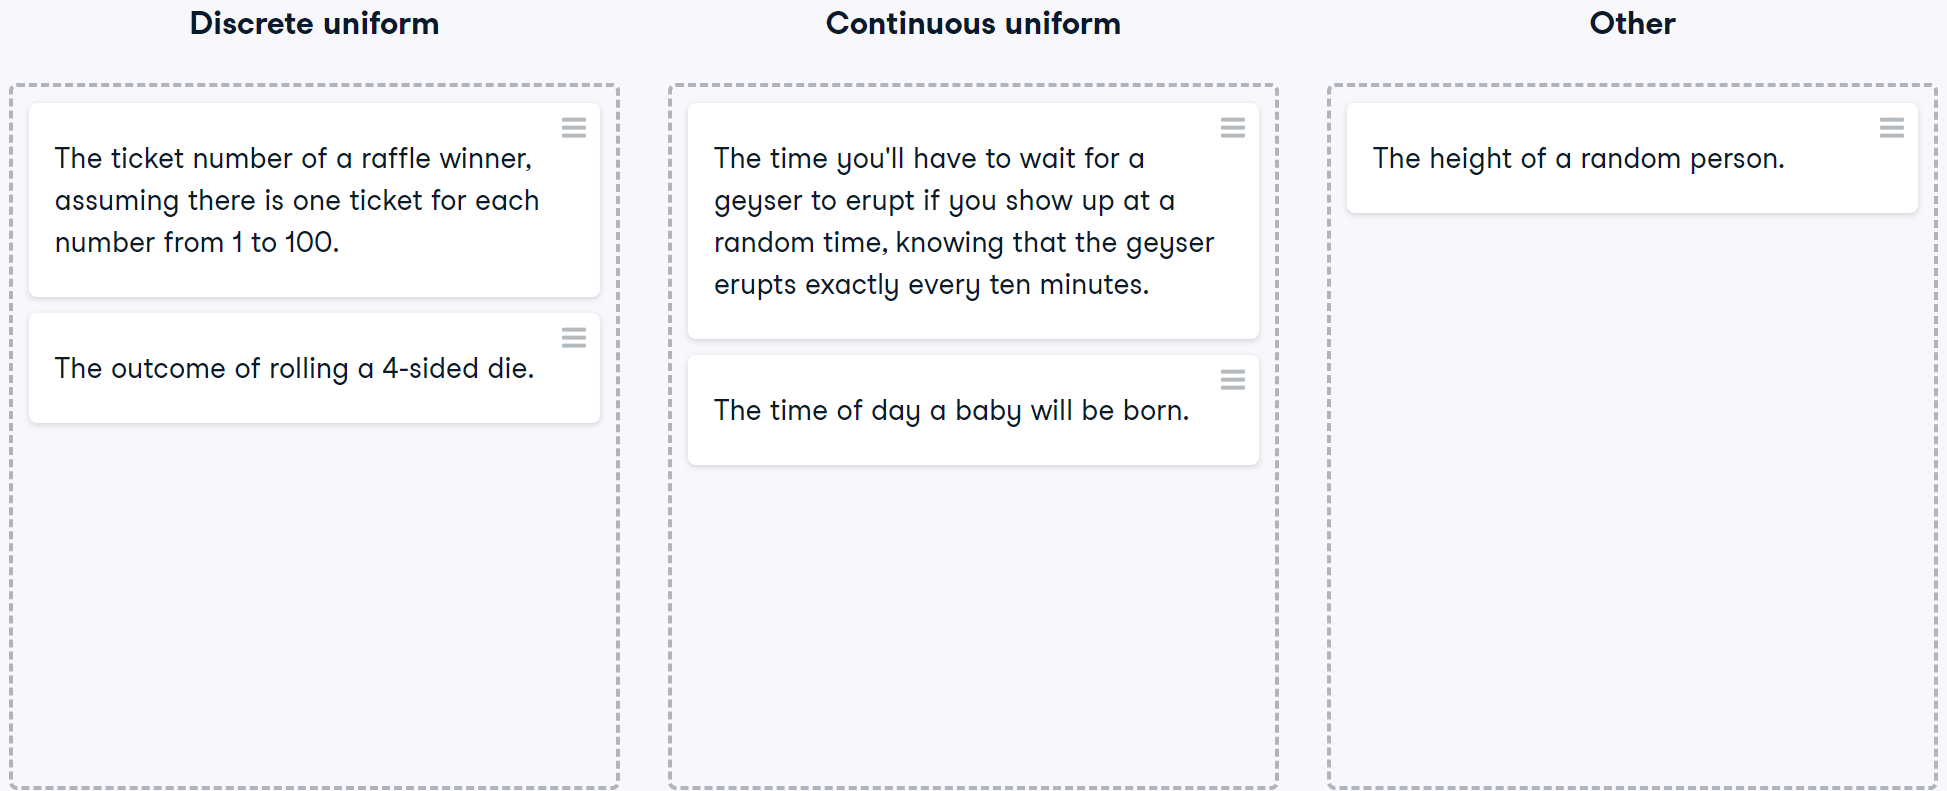

#### `Data back-ups`
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

#### Instruction
1. To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as __min_time__ and his longest possible wait time as __max_time__. Remember that back-ups happen every 30 minutes.
2. Import __uniform__ __from scipy.stats__ and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called __prob_less_than_5__.
3. Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called __prob_greater_than_5__.
4. Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called __prob_between_10_and_20__.

In [13]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [14]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, loc=min_time, scale=max_time - min_time)
print(prob_less_than_5)

0.16666666666666666


In [15]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, loc=min_time, scale=max_time-min_time) - uniform.cdf(10, loc=min_time, scale=max_time - min_time)
print(prob_between_10_and_20)

0.3333333333333333


#### `Simulating wait times`
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

As usual, __pandas__ as __pd__, __numpy__ as __np__, and __matplotlib.pyplot__ as __plt__ are loaded.

1. Set the random __seed__ to 334.
2. Import __uniform__ from __scipy.stats__.
3. Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as __wait_times__.
4. Create a histogram of the simulated __wait times__ and show the plot.

In [16]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(loc=0, scale=30, size=1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

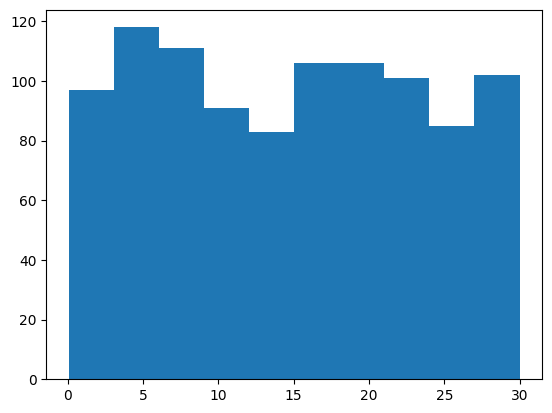

In [17]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

#### `Simulating sales deals`
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

__numpy__ is imported as __np__.

1. Import __binom__ from __scipy.stats__ and set the random __seed__ to ___10___.
2. Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
3. Simulate a typical week of Amir's deals, or one week of 3 deals.
4. Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
Print the mean number of __deals__ he won per week.

In [18]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

In [19]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


In [20]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

[1]


In [21]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(n=3, p=0.3, size=52)

# Print mean deals won per week
print(deals.mean())

0.8269230769230769


#### `Calculating binomial probabilities`
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

__binom__ is imported from __scipy.stats__.

- What's the probability that Amir closes all 3 deals in a week? Save this as __prob_3__.

In [26]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(k=3, n=3, p=0.3)

print(prob_3)

0.027


- What's the probability that Amir closes 1 or fewer deals in a week? Save this as __prob_less_than_or_equal_1__.

In [27]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


- What's the probability that Amir closes more than 1 deal? Save this as __prob_greater_than_1__.

In [28]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


#### `How many sales will be won?`
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by ___n * p___.

- Calculate the expected number of sales out of the ___3___ he works on that - Amir will win each week if he maintains his ___30%___ win rate.
- Calculate the expected number of sales out of the ___3___ he works on that he'll win if his win rate drops to __25%__.
- Calculate the expected number of sales out of the ___3___ he works on that he'll win if his win rate rises to __35%__.

In [ ]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)